# VacationPy
----



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

# Import API key
from api_keys import g_key


### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [2]:
weather_data = pd.read_csv("weather_data.csv")
weather_data

,city,country,lat,lon,temp,temp_max,windspeed,cloudall,humidity
0,coquimbo,CL,-29.9533,-71.3436,60.53,60.53,11.50,20,55
1,bethel,US,41.3712,-73.4140,61.88,64.04,1.99,90,83
2,puerto ayora,EC,-0.7393,-90.3518,71.55,76.96,5.99,90,87
3,punta arenas,CL,-53.1500,-70.9167,55.51,55.51,28.77,40,54
4,qaanaaq,GL,77.4840,-69.3632,28.26,28.26,13.51,100,80
...,...,...,...,...,...,...,...,...,...
570,ndele,CF,8.4109,20.6473,74.61,74.61,2.66,100,73
571,murgab,TM,37.4966,61.9714,46.27,46.27,6.91,0,49
572,viedma,AR,-40.8135,-62.9967,71.47,71.47,13.11,0,29
573,oranjestad,AW,12.5240,-70.0270,89.55,89.55,14.97,20,62


In [3]:
### Humidity Heatmap
#Configure gmaps.
# Use the Lat and Lng as locations and Humidity as the weight.
# Add Heatmap layer to map.


# Need to get geocodes for citites and count the resturants per city as the degree for the heat map 
# Configure gmaps
gmaps.configure(api_key=g_key)

locations = weather_data[["lat", "lon"]]
humidity = weather_data["humidity"].astype(float)


In [4]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, 
                                 dissipating=False, max_intensity=99,
                                 point_radius=3)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.
* A max temperature lower than 90 degrees but higher than 75.
* Wind speed less than 10 mph.
* < 5% cloudiness.
* Drop any rows that don't contain all three conditions. You want to be sure the weather is ideal.

In [5]:
# Using the criteria above create my ideal weather dataframe 

ideal_weather_data = weather_data.loc[(weather_data["temp_max"] < 90) & 
                                      (weather_data["temp_max"] > 75) & 
                                      (weather_data["cloudall"] < 5) & 
                                      (weather_data["windspeed"] < 10)] 

# Adding a blank "Hotel Name" column for later use 
ideal_weather_data = ideal_weather_data.reindex(columns = ideal_weather_data.columns.tolist() 
                                  + ["Hotel Name"])
ideal_weather_data 


,city,country,lat,lon,temp,temp_max,windspeed,cloudall,humidity,Hotel Name
5,borazjan,IR,29.2666,51.2159,87.13,87.13,2.93,0,14,NaN
104,saint george,US,37.1041,-113.5841,72.41,75.63,1.99,1,31,NaN
116,bonwapitse,BW,-23.0766,26.7037,75.69,75.69,7.40,0,22,NaN
169,half moon bay,US,37.4636,-122.4286,69.93,75.51,8.05,1,50,NaN
177,minab,IR,27.1467,57.0801,85.50,85.50,8.77,0,21,NaN
208,riyadh,SA,24.6877,46.7219,80.74,80.74,3.87,1,17,NaN
214,damietta,EG,31.4165,31.8133,75.09,75.09,9.62,0,66,NaN
221,isla vista,US,34.4133,-119.8610,74.89,81.07,6.91,1,45,NaN
222,saint anthony,US,45.0205,-93.2180,75.34,78.06,5.01,1,68,NaN
225,juegang,CN,32.3174,121.1855,75.94,76.98,5.86,2,94,NaN


### Hotel Map
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [6]:
target_type = "hotel"
radius = 5000

# Loop through the dataframe, call the google api for each row and find the name of the Hotel near by
# add the hotel name to the ideal_weather_data dataframe 

for index,row in ideal_weather_data.iterrows():
    coords = str(row["lat"]) + ","+ str(row["lon"])

    params = {
        "location": coords,
        "types": target_type,
        "radius": radius,
        "key": g_key
    }

    # Build URL using the Google Maps API
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    try:
        # Run request
        response = requests.get(base_url, params)
        hotels = response.json()
        ideal_weather_data.loc[index,"Hotel Name"] = hotels["results"][0]["name"]
        
    except:
        print("No hotels in the area") 



No hotels in the area


In [7]:
ideal_weather_data = ideal_weather_data.dropna()
ideal_weather_data

,city,country,lat,lon,temp,temp_max,windspeed,cloudall,humidity,Hotel Name
5,borazjan,IR,29.2666,51.2159,87.13,87.13,2.93,0,14,Borazjan
104,saint george,US,37.1041,-113.5841,72.41,75.63,1.99,1,31,St. George
169,half moon bay,US,37.4636,-122.4286,69.93,75.51,8.05,1,50,Half Moon Bay
177,minab,IR,27.1467,57.0801,85.50,85.50,8.77,0,21,Minab
208,riyadh,SA,24.6877,46.7219,80.74,80.74,3.87,1,17,Riyadh
214,damietta,EG,31.4165,31.8133,75.09,75.09,9.62,0,66,Damietta
221,isla vista,US,34.4133,-119.8610,74.89,81.07,6.91,1,45,Santa Barbara
222,saint anthony,US,45.0205,-93.2180,75.34,78.06,5.01,1,68,Minneapolis
225,juegang,CN,32.3174,121.1855,75.94,76.98,5.86,2,94,Nantong
236,naliya,IN,23.2667,68.8333,81.37,81.37,7.63,0,76,Naliya


In [8]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Hotel</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{city}</dd>
<dt>Country</dt><dd>{country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in ideal_weather_data.iterrows()]


In [9]:
# Add marker layer ontop of heat map
marker_locations = ideal_weather_data[['lat', 'lon']]

# Create a marker_layer using the ideal weather info 
#fig = gmaps.figure()
markers = gmaps.marker_layer(marker_locations, info_box_content=[info_box_template.format(**row) for index, row in ideal_weather_data.iterrows()])
# Display figure

fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

Screen capture of the heat map
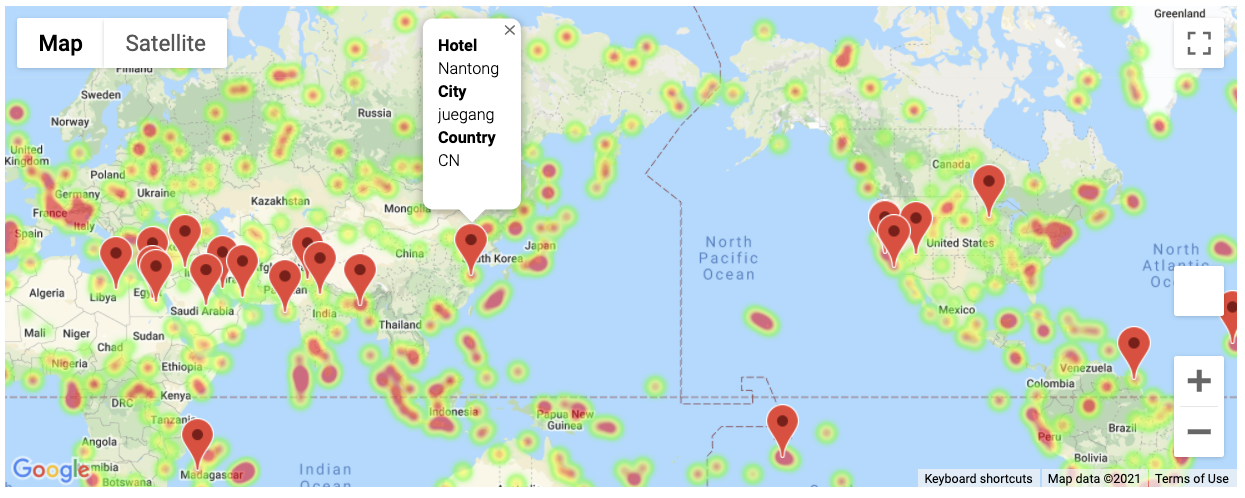